In [38]:
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
teams = """Team Name	Division	Seed	Ceiling	Ceiling value	Floor	Floor value
Brute	Women's	1	Champion	13	Semis	5
Fury	Women's	2	Champion	13	Semis	5
Riot	Women's	3	Champion	13	Quarters	2
Molly Brown	Women's	4	Champion	13	Quarters	2
Scandal	Women's	5	Semis	5	Quarters	2
Ozone	Women's	6	Semis	5	Prequarters	1
6ixers	Women's	7	Quarters	2	Prequarters	1
Nightlock	Women's	8	Quarters	2	Prequarters	1
Nemesis	Women's	9	Quarters	2	No Bracket	0
Rival	Women's	10	Quarters	2	No Bracket	0
Phoenix	Women's	11	Quarters	2	No Bracket	0
Heist	Women's	12	Prequarters	1	No Bracket	0
Schwa	Women's	13	Prequarters	1	No Bracket	0
Traffic	Women's	14	Prequarters	1	No Bracket	0
Pop	Women's	15	Prequarters	1	No Bracket	0
Wildfire	Women's	16	Prequarters	1	No Bracket	0
Revolver	Men's	1	Champion	13	Semis	5
Sockeye	Men's	2	Champion	13	No Bracket	0
PoNY	Men's	3	Champion	13	Quarters	2
Ring	Men's	4	Champion	13	Quarters	2
Furious	Men's	5	Quarters	2	No Bracket	0
Truck	Men's	6	Champion	13	Quarters	2
DiG	Men's	7	Finalist	9	Quarters	2
Madison	Men's	8	Quarters	2	No Bracket	0
Machine	Men's	9	Quarters	2	No Bracket	0
Rhino	Men's	10	Quarters	2	No Bracket	0
Doublewide	Men's	11	Semis	5	Prequarters	1
Sub Zero	Men's	12	Quarters	2	Prequarters	1
High Five	Men's	13	Prequarters	1	No Bracket	0
Temper	Men's	14	Quarters	2	No Bracket	0
Bravo	Men's	15	Prequarters	1	No Bracket	0
Chain	Men's	16	Prequarters	1	No Bracket	0
AMP	Mixed	1	Champion	13	Semis	5
Drag'n	Mixed	2	Champion	13	Semis	5
Mixtape	Mixed	3	Champion	13	Quarters	2
BFG	Mixed	4	Finalist	9	Quarters	2
Snake	Mixed	5	Semis	5	Prequarters	1
Space Heater	Mixed	6	Semis	5	Prequarters	1
shame.	Mixed	7	Semis	5	Prequarters	1
Blackbird	Mixed	8	Quarters	2	Prequarters	1
Slow White	Mixed	9	Semis	5	Prequarters	1
Mischief	Mixed	10	Semis	5	No Bracket	0
Polar Bears	Mixed	11	Quarters	2	No Bracket	0
No Touching!	Mixed	12	Quarters	2	No Bracket	0
Toro	Mixed	13	Prequarters	1	No Bracket	0
XIST	Mixed	14	Prequarters	1	No Bracket	0
Jughandle	Mixed	15	Quarters	2	No Bracket	0
Columbus Cocktails	Mixed	16	Prequarters	1	No Bracket	0
"""

In [11]:
full_df = pd.read_csv(io.StringIO(teams), sep='\t')

In [12]:
full_df.style.bar(subset=["Ceiling value", "Floor value"], color="lightgreen")

,Team Name,Division,Seed,Ceiling,Ceiling value,Floor,Floor value
0,Brute,Women's,1,Champion,13,Semis,5
1,Fury,Women's,2,Champion,13,Semis,5
2,Riot,Women's,3,Champion,13,Quarters,2
3,Molly Brown,Women's,4,Champion,13,Quarters,2
4,Scandal,Women's,5,Semis,5,Quarters,2
5,Ozone,Women's,6,Semis,5,Prequarters,1
6,6ixers,Women's,7,Quarters,2,Prequarters,1
7,Nightlock,Women's,8,Quarters,2,Prequarters,1
8,Nemesis,Women's,9,Quarters,2,No Bracket,0
9,Rival,Women's,10,Quarters,2,No Bracket,0


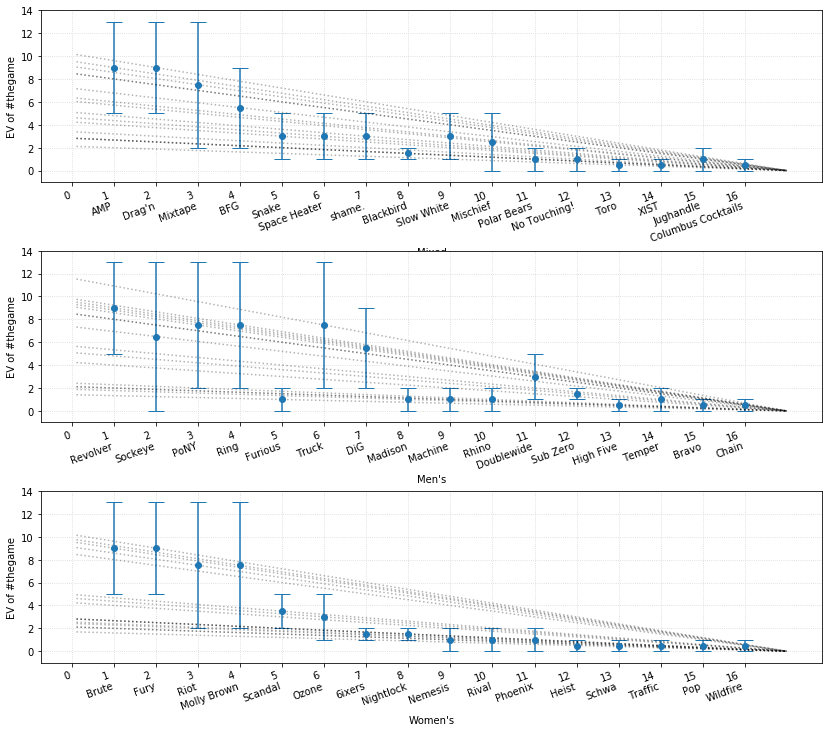

In [87]:
def make_line(x1, y1, x2, y2, linspace):
  slope = (y1-y2)/(x1-x2)
  y_intercept = (x1*y2 - x2*y1) / (x1-x2)
  # import pdb; pdb.set_trace()
  return slope * linspace + y_intercept

fig, axes = plt.subplots(3, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4)
for i, division in enumerate(("Mixed", "Men's", "Women's")):
  df = full_df.loc[full_df["Division"] == division]
  ax = axes[i]
  ax.errorbar(df["Seed"], (df["Ceiling value"] + df["Floor value"]) / 2.0,
              yerr=(df["Ceiling value"] - df["Floor value"]) / 2.0,
              fmt='o', capsize=8)
  for _, row in df.iterrows():
    linspace = np.linspace(0.1, 17, num=100)
    countour = make_line(17, 0, row["Seed"], ((row["Ceiling value"] + row["Floor value"]) / 2.0),
                         linspace)
    ax.plot(linspace, countour,
            '-', color="k", linestyle='dotted', alpha=0.3)
  ax.set_xticks(np.arange(0, len(df) + 1))
  xticks = ["0"] + ["{i}\n{t}".format(i=i+1, t=team) for i, team in enumerate(df["Team Name"])]
  ax.set_xticklabels(xticks, rotation=20, ha="right")
  ax.grid(linestyle='dotted', color="lightgray")
  ax.set_ylim(-1, 14)
  ax.set_xlabel(division)
  ax.set_ylabel("EV of #thegame")
  # plt.setp(ax.get_xticklabels(), visible=True)

Dotted lines are countour lines of seed vs "expected value" according to ultiworld's projections.